# < 국회 입법 활동 시각화>

# Start : 국회에 대해 우리는 얼마나 알고있을까?

저를 포함한 대부분의 사람들이 국회에 어떤 사람들이 있고, 어떤 일을 하는지 잘 알지 못합니다.
데이터 분석을 수행하고 그 결과가 이미 잘 알고있는 사실들을 확인하는데 그친다면 그저 무의미한 반복에 지나지 않을 것입니다. 저는 이번에 <span style="color:blue">**20대 국회의 입법활동**</span>에 초점을 맞춰서 분석하고 평가하는 것을 목적으로 하겠습니다. ~~(21대 국회는 현재진행중이고 20대 국회가 가장 최근이기 때문에 20대 국회를 분석하겠습니다.)~~

### Package, Data load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

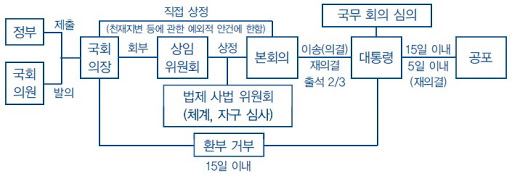

In [2]:
Image('D:\DIAMOND\Downloads\법률안처리과정.jpg')

In [3]:
df_people = pd.read_csv('data/new_people.csv',encoding='cp949')
df_process = pd.read_csv('data/process.csv',low_memory=False)
df_suggest = pd.read_csv('data/suggest.csv')

pp = df_people.copy()
pc = df_process.copy()
sg = df_suggest.copy()

new_people 데이터에는 역대 국회의원 현황 5605건,
suggest에는 국회의원 발의법의안 62658건,
process 본회의 처리 안건 68530건이 있습니다.
약간의 전처리를 통해 시각화 및 인사이트 도출을 시작하겠습니다.

In [4]:
# 전처리

# 정희용 의원 생년월일만 빠져있어서 채워주었습니다.
pp.loc[pp['BIRTH'] == '    년   월   일' , 'BIRTH'] = '1976년 10월 01일'

pp['year'] = pp['DAESU'].replace({1:'1대(1948~1950)', 2:'2대(1950~1954)', 3:'3대(1954~1958)', 4:'4대(1958~1960)', 5:'5대(1960~1963)',
                        6:'6대(1963~1967)', 7:'7대(1967~1971)', 8:'8대(1971~1972)', 9:'9대(1973~1979)', 10:'10대(1979~1980)',
                        11:'11대(1981~1985)', 12:'12대(1985~1988)', 13:'13대(1988~1992)', 14:'14대(1992~1996)', 15:'15대(1996~2000)',
                        16:'16대(2000~2004)', 17:'17대(2004~2008)', 18:'18대(2008~2012)', 19:'19대(2012~2016)', 20:'20대(2016~2020)',
                        21:'21대(2020~2024)'})

sg['year'] = sg['AGE'].replace({1:'1대(1948~1950)', 2:'2대(1950~1954)', 3:'3대(1954~1958)', 4:'4대(1958~1960)', 5:'5대(1960~1963)',
                        6:'6대(1963~1967)', 7:'7대(1967~1971)', 8:'8대(1971~1972)', 9:'9대(1973~1979)', 10:'10대(1979~1980)',
                        11:'11대(1981~1985)', 12:'12대(1985~1988)', 13:'13대(1988~1992)', 14:'14대(1992~1996)', 15:'15대(1996~2000)',
                        16:'16대(2000~2004)', 17:'17대(2004~2008)', 18:'18대(2008~2012)', 19:'19대(2012~2016)', 20:'20대(2016~2020)',
                        21:'21대(2020~2024)'})

pc['year'] = pc['AGE'].replace({1:'1대(1948~1950)', 2:'2대(1950~1954)', 3:'3대(1954~1958)', 4:'4대(1958~1960)', 5:'5대(1960~1963)',
                        6:'6대(1963~1967)', 7:'7대(1967~1971)', 8:'8대(1971~1972)', 9:'9대(1973~1979)', 10:'10대(1979~1980)',
                        11:'11대(1981~1985)', 12:'12대(1985~1988)', 13:'13대(1988~1992)', 14:'14대(1992~1996)', 15:'15대(1996~2000)',
                        16:'16대(2000~2004)', 17:'17대(2004~2008)', 18:'18대(2008~2012)', 19:'19대(2012~2016)', 20:'20대(2016~2020)',
                        21:'21대(2020~2024)'})

In [5]:
# 전처리
pc['PROC_RESULT_CD'] = pc['PROC_RESULT_CD'].replace({'수정가결':'가결',
                                                    '원안가결':'가결',
                                                    '가결':'가결',
                                                    '채택':'가결',
                                                    '대안반영폐기':'폐기',
                                                    '수정안반영폐기':'폐기',
                                                    '회기불계속폐기':'폐기',
                                                    '심사대상제외':'철회'})

sg['PROC_RESULT'] = sg['PROC_RESULT'].replace({'수정가결':'가결',
                                                    '원안가결':'가결',
                                                    '가결':'가결',
                                                    '채택':'가결',
                                                    '대안반영폐기':'폐기',
                                                    '수정안반영폐기':'폐기',
                                                    '회기불계속폐기':'폐기',
                                                    '심사대상제외':'철회'})


In [6]:
pc['count']=1
list_dae = pc.AGE.unique().tolist()

# pp_dae1 ,pp_dae2 ....
for i in list_dae:
    globals()['pp_dae'+str(i)] = pp[pp.DAESU == i]

# pc_dae1 ,pc_dae2 ....
for i in list_dae:
    globals()['pc_dae'+str(i)] = pc[pc.AGE == i]

# sg_dae1, sg_dae2 ...
for i in list_dae:
    globals()['sg_dae'+str(i)] = sg[sg.AGE == i]

In [7]:
# 법안제안 주체별로 법안 구분

list_의원안=[]
list_위원회안=[]
list_정부안=[]

for i in [pc_dae14,pc_dae15,pc_dae16,pc_dae17,pc_dae18,pc_dae19,pc_dae20]:
    의원안 = i['BILL_NAME'].str.contains("의원").sum()+i['BILL_NAME'].str.contains("의장").sum()
    위원회안 = i['BILL_NAME'].str.contains("위원").sum()
    정부안 = i['BILL_NAME'].str.contains("정부").sum()
    list_의원안.append(의원안)
    list_위원회안.append(위원회안)
    list_정부안.append(정부안)

df_prop = pd.DataFrame()
df_prop['의원안'] = list_의원안
df_prop['위원회안'] = list_위원회안
df_prop['정부안'] = list_정부안

df_prop.index=['14대','15대','16대','17대','18대','19대','20대']

In [8]:
# 법안제안 주체별로 가결률 구분

pclist=[pc_dae13,pc_dae14,pc_dae15,pc_dae16,pc_dae17,pc_dae18,pc_dae19,pc_dae20]

list_의원가결=[]
list_위원가결=[]
list_정부가결=[]

for i in pclist:
    a=i[i['BILL_NAME'].str.contains("의원")]['PROC_RESULT_CD'].value_counts(normalize=True).sort_index()
    list_의원가결.append(np.round(a['가결']*100,2))
    
for i in pclist:
    a=i[i['BILL_NAME'].str.contains("위원")]['PROC_RESULT_CD'].value_counts(normalize=True).sort_index()
    list_위원가결.append(np.round(a['가결']*100,2))
    
for i in pclist:
    a=i[i['BILL_NAME'].str.contains("정부")]['PROC_RESULT_CD'].value_counts(normalize=True).sort_index()
    list_정부가결.append(np.round(a['가결']*100,2))
    
df_가결 = pd.DataFrame()
df_가결['의원안'] = list_의원가결
df_가결['위원회안'] = list_위원가결
df_가결['정부안'] = list_정부가결
index = pc['year'].unique().tolist()[1:9]
index.reverse()
df_가결.index=index

In [9]:
# 위원회별 법안의 처리결과 데이터프레임
# 원핫인코딩

sg20_committee_result = sg_dae20[['COMMITTEE','PROC_RESULT']]
sg20_cr = pd.get_dummies(sg20_committee_result,columns=['PROC_RESULT'])
sg20_cr.columns=['위원회', '가결', '부결', '임기만료폐기','철회', '폐기']
sg_com_result = sg20_cr.pivot_table(index='위원회',values=['가결', '부결', '임기만료폐기',
                                        '철회', '폐기'],aggfunc='sum',margins = True)
sg_com_result['소관 법안수'] = sg_com_result['가결']+sg_com_result['부결']+sg_com_result['임기만료폐기']+sg_com_result['철회']+sg_com_result['폐기']
sg_com_result=sg_com_result.astype('int')

sg_com_result['가결%']=np.round(sg_com_result['가결']/sg_com_result['소관 법안수']*100,2)
sg_com_result['임기만료폐기%']=np.round(sg_com_result['임기만료폐기']/sg_com_result['소관 법안수']*100,2)
sg_com_result['폐기%']=np.round(sg_com_result['폐기']/sg_com_result['소관 법안수']*100,2)

# 1. 제 20대 국회의 입법활동 평가

## 1-1. 양적 측면에서의 평가
- 국회에 제출 되는 의안에는 법률안,결산안,예산안,기타등이 있는데 그 중 법률안이 대다수를 차지하고, 제 20대 국회에 제출된 의안은 총 21594건 이었습니다. 이 는 제 19대 국회에서 제출된 15444건의 법안 보다 6150건, 약 1.4배 정도 늘었습니다. 제 13대 국회 이후로 국회에 제출된 법안 수를 보면 제 14대 국회에서 근소하게 감소했던 것을 제외하면 점진적으로 증가 하고 있으며, 그 증가율은 폭발적인 것을 볼 수있습니다.
- 특히 위원회안의 증가율은 그렇게 높지 않고 정부안의 경우 오히려 조금 줄어드는 경향이 있지만, 의원들이 제출한 법안은 역대 국회에서 가장 많은 16706건이 제출 되었습니다. <span style="color:blue">**이를 통해 제 20대 국회의 입법의제 제안활동은 어느 때 보다도 활발했다고 볼 수 있습니다.**</span>


◆20대 국회 발의법의안 : 21594
◆19대 국회 발의법의안 : 15444


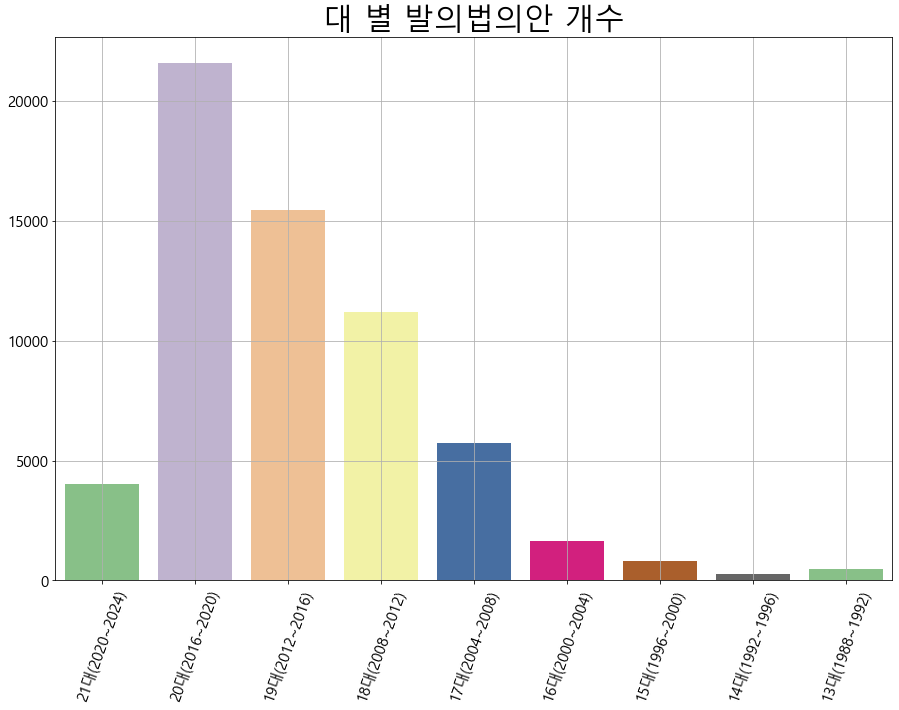

In [10]:
#대 별 법안 발의안 개수
plt.figure(figsize=(15,10))
sns.countplot(data = sg[sg['AGE']>=13], x = 'year', palette = 'Accent')
plt.title('대 별 발의법의안 개수',size=30)

plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 70,size=15)
plt.yticks(size=15)
plt.grid(True)

print("◆20대 국회 발의법의안 : %d" %sg_dae20.shape[0])
print("◆19대 국회 발의법의안 : %d" %sg_dae19.shape[0])

,의원안,위원회안,정부안
14대,499,393,693
15대,1110,645,958
16대,1981,630,856
17대,5231,1106,1232
18대,8072,1498,1328
19대,11582,1823,1024
20대,16706,1967,1087


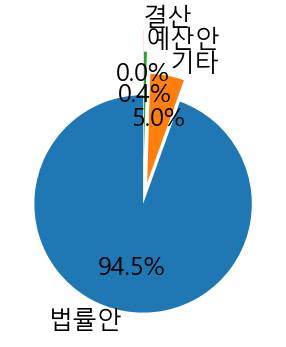

In [11]:
# 20대 국회 발의 법의안 종류
pie_ratio = pc_dae20['BILL_KIND'].value_counts().values.tolist()
pie_labels = pc_dae20['BILL_KIND'].value_counts().index.tolist()
plt.figure(figsize=(5,5))
explode=[0,0.2,0.4,0.6]
pie = plt.pie(pie_ratio, autopct='%.1f%%', 
              startangle=90,
              textprops={'fontsize': 25},
             labels=pie_labels,
             explode=explode)

df_prop

## 1-2 법안 처리 측면에서의 평가
- 밑에 그래프는 제 13대 국회 이후로 법안을 제안한 주체별로 가결률을 나타낸것입니다. 제 20대 국회의 법안가결률을 법안 제안 주체별로 비교하면 위원회안은 90.39%, 정부안은 53.36%, 의원안은 9.26%로 나타났습니다. 의원안의 가결률은 위원회안과 정부안의 가결률과 비교해 볼 때 크게 떨어지는 수치입니다. <span style="color:blue">**의원안의 발의건수가 압도적으로 많은데 비해, 가결률이 떨어지는 것을 보면 법안의 품질이 높지않다는 것을 의미합니다.**</span>



- 제 13대 국회이후 가결률의 변화를 살펴보면, 위원회안의 경우  제 14대 국회를 제외하고는 계속해서 90%를 넘을 정도로 높은 가결률을 보여주고 있고, 정부안과 의원안의 경우에는 가결률이 점차적으로 하락하는 경향을 보이고, <span style="color:blue">특히 정부안의 가결률 하락이 두드러집니다.</span>

Text(0.5, 1.0, '법안제안 주체별 법안가결률 추이')

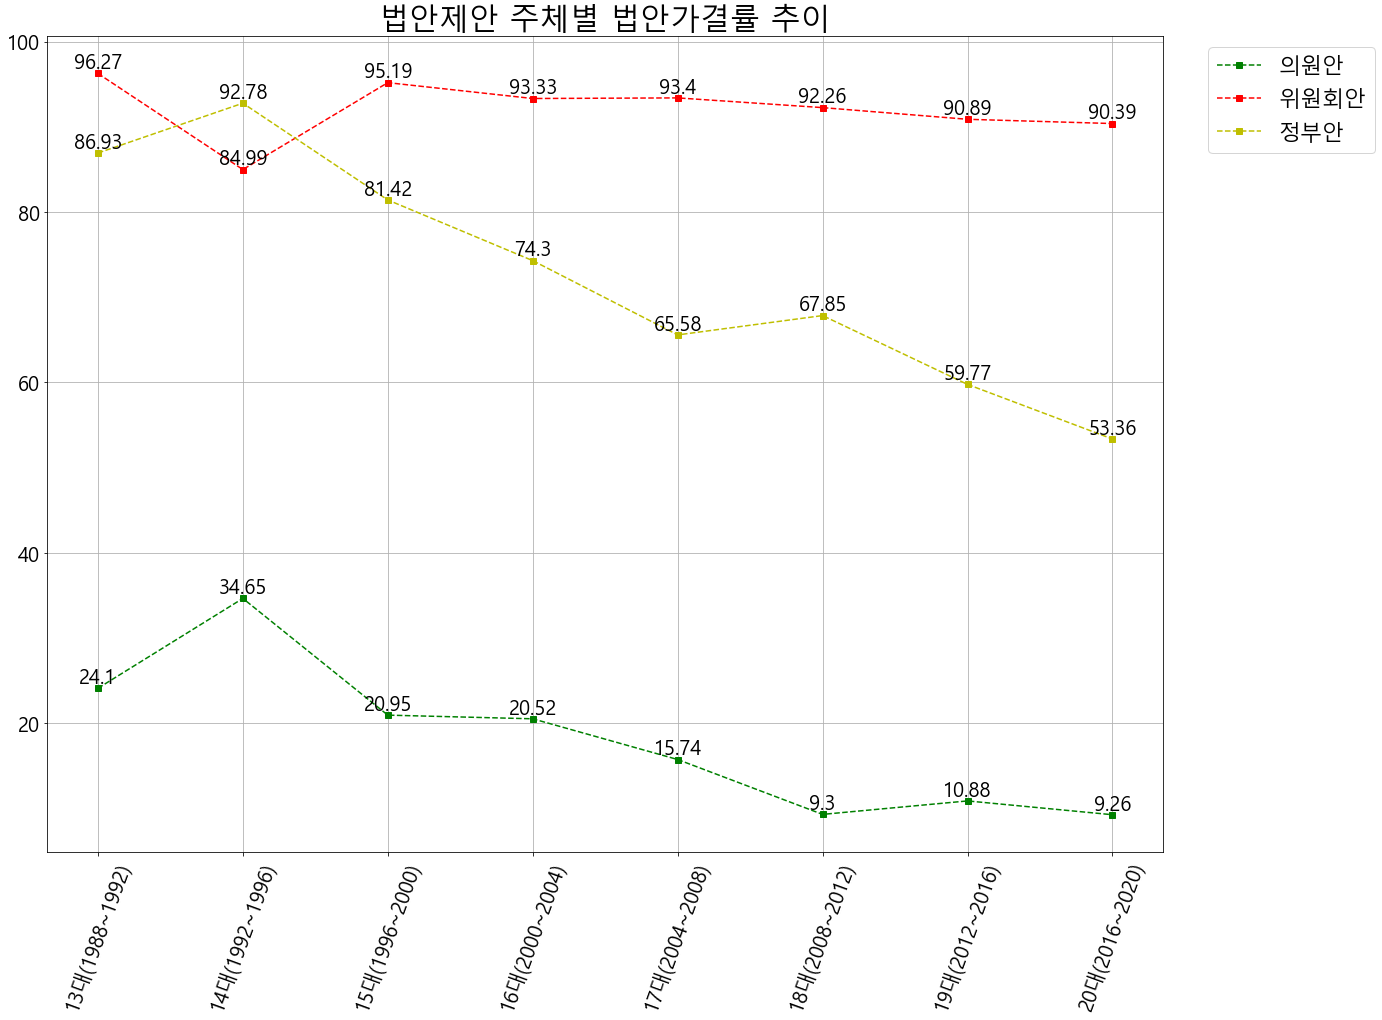

In [12]:
# 법안제안 주체별 법안가결률 선그래프

plt.figure(figsize=(20,15))
plt.plot(df_가결.index,df_가결['의원안'],label="의원안",linestyle='--',color='g',marker='s')
for i,v in zip(df_가결.index,df_가결['의원안']):
    plt.text(i,v,v,
            fontsize = 20, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.plot(df_가결.index,df_가결['위원회안'],label="위원회안",linestyle='--',color='r',marker='s')
for i,v in zip(df_가결.index,df_가결['위원회안']):
    plt.text(i,v,v,
            fontsize = 20, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.plot(df_가결.index,df_가결['정부안'],label="정부안",linestyle='--',color='y',marker='s')
for i,v in zip(df_가결.index,df_가결['정부안']):
    plt.text(i,v,v,
            fontsize = 20, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')

plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right',fontsize=22)
plt.xticks(rotation = 70,size=20)
plt.yticks(size=20)
plt.grid(True)
plt.title('법안제안 주체별 법안가결률 추이',size=30)

- 다음 데이터프레임(sg_com_result)은 제 20대 국회에 제출된 법안을 소관위원회별로 구분하여 처리결과를 나타낸 것입니다. 이 데이터에 따르면 전체 법안 중에서 6.66%(1437건)이 가결되었고, 대안반영폐기를 포함한 폐기가 24.52%, 임기만료로 폐기된 법안이 67.83%입니다. 폐기는 위원회 심사단계에서 법안을 폐기하는 결정을 내린 것인 반면에, 임기만료 폐기는 제 20대 국회의 임기가 만료되면서 자동폐기된 것이라는 점에서 차이가 있습니다. 이 데이터에서 눈에 띄는 점은 21590건의 법안 중에서 '부결'로 처리된 법안이 총 2건 밖에 안된다는 점입니다. 이를 통해 위원회를 통과한 법안은 대부분 본회의에서 가결되거나, 임기만료로 폐기되며, 본회의에서 부결될 만한 법안은 위원회 심사단계를 통과하지 못한다는 것을 유추할 수 있었습니다.

- 제 20대 국회에서는 16개의 상임위원회와 2개의 상설특별위원회와 다수의 특별위원회가 한시적으로 운영되었습니다. 밑의 데이터프레임을 살펴보면 각 위원회별로 소관법안의 수에 큰 차이가 있으며, 법안의 가결률을 비롯한 처리율도 천차만별임을 알 수 있습니다. 우선 특별위원회를 제외하면 미래창조과학방송통신위원회가 10건으로 소관 법안수가 가장 적었고, 정보위원회 32건, 산업통상자원위원회 81건으로 적었습니다. 법안의 가결률이 가장 높은 상임위원회는 미래창조과학방송통신위원회(60%)였고, 이어서 산업통상자원위원회(53.09%), 교육문화체육관광위원회(36.27%)의 순서대로 법안가결률이 높았습니다. 반대로 정보위원회(0%),국회운영위원회(1.56%),기획재정위원회(1.64%)는 법안가결률이 가장 낮은 세 개의 위원회 입니다. <span style="color:blue">전반적으로 소관법안이 많은 위원회일수록 법안 가결률이 떨어졌고, 소관법안이 적은 위원회가 상대적으로 가결률이 높았습니다.</span>

In [13]:
sg_com_result

,가결,부결,임기만료폐기,철회,폐기,소관 법안수,가결%,임기만료폐기%,폐기%
위원회,,,,,,,,,
과학기술정보방송통신위원회,62,0,664,7,198,931,6.66,71.32,21.27
교육문화체육관광위원회,70,0,0,24,99,193,36.27,0.00,51.30
교육위원회,58,0,732,2,98,890,6.52,82.25,11.01
국방위원회,30,0,312,11,129,482,6.22,64.73,26.76
국토교통위원회,212,0,1200,19,571,2002,10.59,59.94,28.52
국회운영위원회,8,0,426,14,64,512,1.56,83.20,12.50
기획재정위원회,32,0,1143,35,741,1951,1.64,58.59,37.98
농림축산식품해양수산위원회,223,0,545,15,633,1416,15.75,38.49,44.70
문화체육관광위원회,58,0,586,0,105,749,7.74,78.24,14.02


# 2. 결론

- 제 20대 국회는 입법 제안의 양적인 측면에서는 지난 다른 국회보다도 활발한 입법활동이 이루어졌습니다. 하지만 국회의 입법활동은 의원들이 법안을 활발히 발의하는 것만으로 끝나는 것이 아닙니다. 의원안의 가결률은 9.26%, 정부안의 가결률은 53.36%로 역대 최저를 찍었고, 이는 보여주기식 입법이 남발되고 있고, 실효성 있는 법안이 별로 없다는 것입니다. 법안 발의 건수의 양적 성장에 비해 법안의 질적 성장이 미치지 못하고 있는 것입니다.



- 이번에 새롭게 시작된 21대 국회에서는 많은 문제점들이 개선되어 국민들의 요구를 전문성 있는 법안으로 제정해 국민의 신뢰를 받을 수 있는 국회로 거듭나기를 바랍니다.

# 번외(늙어가는 국회)

In [28]:
# 대 수 별 국회의원 나이 list 함수 (pp)
# 나이는 월일을 고려하지않고 연도를 기준으로 만나이로 계산했습니다.

def minmaxage(dataframe):
    dataframe = dataframe.reset_index(drop=True)
    agelist=[]
    agelist2=[]
    st = int(dataframe.year[0].replace('(','~').replace(')','~').split('~')[1])
    for i in range(len(dataframe)):
        byear = int(dataframe.BIRTH[i][:4])
        agelist.append(st-byear)
    
    maxage = max(agelist); a=agelist.index(maxage)
    maxname = dataframe.loc[a,'NAME']
    agelist2.append([maxname,maxage])
    
    minage = min(agelist); b=agelist.index(minage)
    minname = dataframe.loc[b,'NAME']
    agelist2.append([minname,minage])
    
    avgage = np.round(sum(agelist)/len(agelist),1)
    agelist2.append(['평균나이',avgage])
        
    return agelist2

In [29]:
# 대 수 별 나이 특징 하나의 데이터프레임으로 만들기

ppdae_list=[pp_dae1,pp_dae2,pp_dae3,pp_dae4,pp_dae5,pp_dae6,pp_dae7,pp_dae8,pp_dae9,pp_dae10,
          pp_dae11,pp_dae12,pp_dae13,pp_dae14,pp_dae15,pp_dae16,pp_dae17,pp_dae18,pp_dae19,pp_dae20,pp_dae21]

allage=[]
for i in ppdae_list:
    agelist = minmaxage(i)
    allage.append(agelist)

list_dae2 = pp['year'].unique().tolist()
list_dae2.reverse()

allage_mean=[]
allage_max=[]
allage_min=[]
allage_maxname=[]
allage_minname=[]

for i in range(21):
    allage_mean.append(allage[i][2][1])
    allage_max.append(allage[i][0][1])
    allage_min.append(allage[i][1][1])
    allage_maxname.append(allage[i][0][0])
    allage_minname.append(allage[i][1][0])

df_age = pd.DataFrame()
df_age['대'] = list_dae2
df_age['평균나이'] = allage_mean
df_age['최고령의원이름'] = allage_maxname
df_age['최고령나이'] = allage_max
df_age['최연소의원이름'] = allage_minname
df_age['최연소나이'] = allage_min


Text(0.5, 1.0, '대 별 국회의원 평균나이')

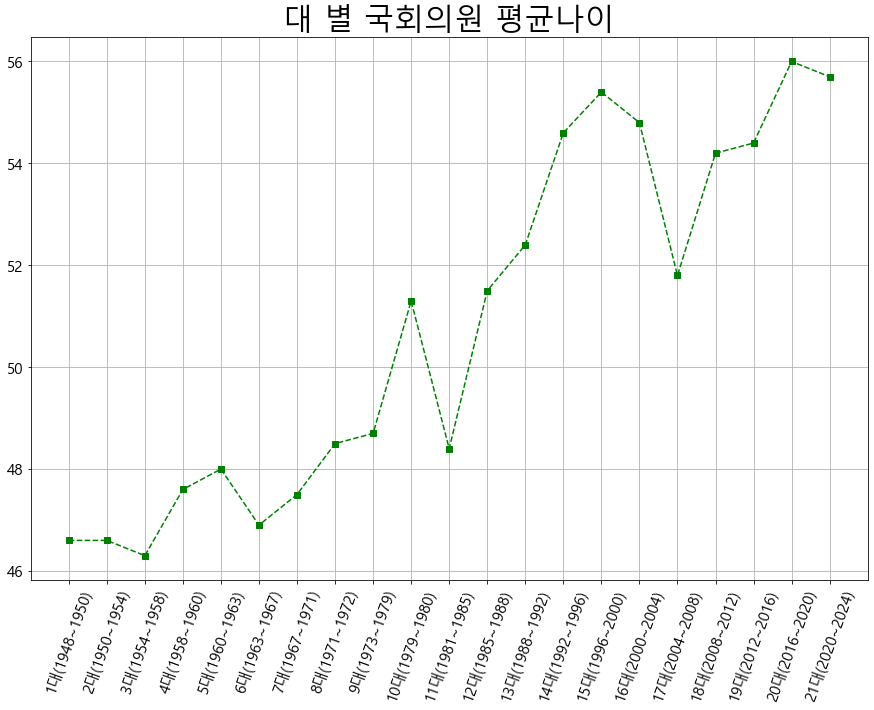

In [30]:
# 대 별 국회의원 평균나이 선 그래프
# 대 별 의원들의 평균나이가 점차 증가하는 것을 볼 때 국회가 점점더 고인다는 느낌을 받음.

plt.figure(figsize=(15,10))
plt.plot(df_age['대'],df_age['평균나이'],label="평균나이",linestyle='--',color='g',marker='s')
plt.xticks(rotation = 70,size=15)
plt.yticks(size=15)
plt.grid(True)
plt.title('대 별 국회의원 평균나이',size=30)

In [31]:
df_age

,대,평균나이,최고령의원이름,최고령나이,최연소의원이름,최연소나이
0,1대(1948~1950),46.6,홍순영,81,배중혁,26
1,2대(1950~1954),46.6,백상규,69,김종회,27
2,3대(1954~1958),46.3,전상요,71,김영삼,27
3,4대(1958~1960),47.6,정문흠,66,강영훈,31
4,5대(1960~1963),48.0,김시현,78,전휴상,26
5,6대(1963~1967),46.9,이상철,70,김상현,28
6,7대(1967~1971),47.5,김도연,73,이기택,30
7,8대(1971~1972),48.5,유봉영,74,조홍래,31
8,9대(1973~1979),48.7,이숙종,69,정대철,29
9,10대(1979~1980),51.3,이효상,73,정대철,35


- 대 별 국회의원 평균 나이가 제 20대 국회에서 역대 최고령(56세)을 찍고 21대 국회는 0.3세 정도 젊어졌지만 역대 2위인 고령국회입니다. 계속해서 평균연령이 증가하는 추세입니다. 평균 연령이 가장 낮은 3대 국회와 20대 국회를 비교하면 차이가 극명합니다. 물론 한국 사회의 평균수명이 늘어나기 때문에 고령화 현상은 불가피한 측면도 있습니다. 하지만 지금의 국회의원 연령 구성으로는 급속한 사회 변화를 따라가기 어렵다고 생각됩니다. 지금의 정치구조에서는 2030대가 정치권에 진입하기가 너무 힘들다고 생각됩니다. 젊은 사람도 정치에 참여할 수 있는 제도적 장치나 차세대 리더를 키우는 전문 교육 프로그램등이 필요하다고 생각됩니다.